In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [11]:
steam_games = pd.read_parquet('steam_games')
user_items = pd.read_parquet('user_items')
game_reviews = pd.read_parquet('game_reviews')

In [12]:
steam_games

,publisher,titles,release_date,price,item_id,developer,genres
88310,Kotoshiro,lost summoner kitty,2018,4.99,761140.0,kotoshiro,"strategy, action, indie, casual, simulation"
88311,"Making Fun, Inc.",ironbound,2018,0.00,643980.0,secret level srl,"free to play, strategy, indie, rpg, card game,..."
88312,Poolians.com,real pool 3d - poolians,2017,0.00,670290.0,poolians.com,"free to play, simulation, sports, casual, indi..."
88313,彼岸领域,弹炸人2222,2017,0.99,767400.0,彼岸领域,"action, adventure, casual"
88315,Trickjump Games Ltd,battle royale trainer,2018,3.99,772540.0,trickjump games ltd,"action, adventure, simulation, fps, shooter, t..."
...,...,...,...,...,...,...,...
120439,Bidoniera Games,kebab it up!,2018,1.99,745400.0,bidoniera games,"action, indie, casual, violent, adventure"
120440,Ghost_RUS Games,colony on mars,2018,1.99,773640.0,"nikita ""ghost_rus""","strategy, indie, casual, simulation"
120441,Sacada,logistical: south africa,2018,4.99,733530.0,sacada,"strategy, indie, casual"
120442,Laush Studio,russian roads,2018,1.99,610660.0,laush dmitriy sergeevich,"indie, simulation, racing"


In [13]:
steam_games['price'].describe()

count    28828.000000
mean         8.624852
std         15.723861
min          0.000000
25%          1.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

In [14]:
user_items['playtime_forever'].describe()

count    5.153209e+06
mean     9.914951e+02
std      5.418204e+03
min      0.000000e+00
25%      0.000000e+00
50%      3.400000e+01
75%      3.550000e+02
max      6.427730e+05
Name: playtime_forever, dtype: float64

In [15]:
game_reviews[['recommend_True', 'sent_neg', 'sent_neu', 'sent_pos']].describe()

,recommend_True,sent_neg,sent_neu,sent_pos
count,3682.000000,3682.000000,3682.000000,3682.000000
mean,14.251222,2.670288,4.092070,9.344378
std,100.918698,14.627603,31.664482,62.614623
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000
50%,2.000000,0.000000,0.000000,1.000000
75%,5.000000,1.000000,2.000000,4.000000
max,3611.000000,557.000000,1152.000000,2297.000000


In [16]:
eda1 = steam_games.copy()
eda1['genres']= eda1['genres'].str.split(', ')
eda1= eda1.explode('genres'). reset_index(drop=True)

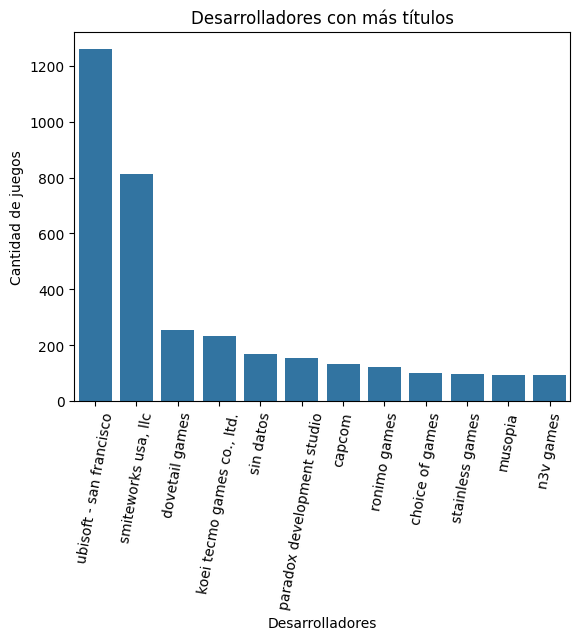

In [17]:
#Desarrolladores con más cantidad de juegos
x = steam_games['developer'].value_counts()[:12].index.tolist()
y = steam_games['developer'].value_counts()[:12].values.tolist()

plt.figure()
sns.barplot(x=x, y=y)
plt.title('Desarrolladores con más títulos')
plt.xlabel('Desarrolladores')
plt.xticks(rotation=80)
plt.ylabel('Cantidad de juegos')
plt.show()

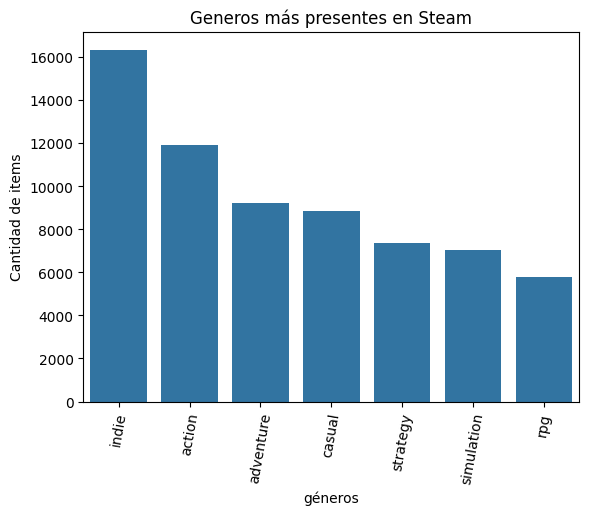

In [18]:
#Generos que están más presentes 
x = eda1['genres'].value_counts()[:7].index.tolist()
y = eda1['genres'].value_counts()[:7].values.tolist()

plt.figure()
sns.barplot(x=x, y=y)
plt.title('Generos más presentes en Steam')
plt.xlabel('géneros')
plt.xticks(rotation=80)
plt.ylabel('Cantidad de items')
plt.show()

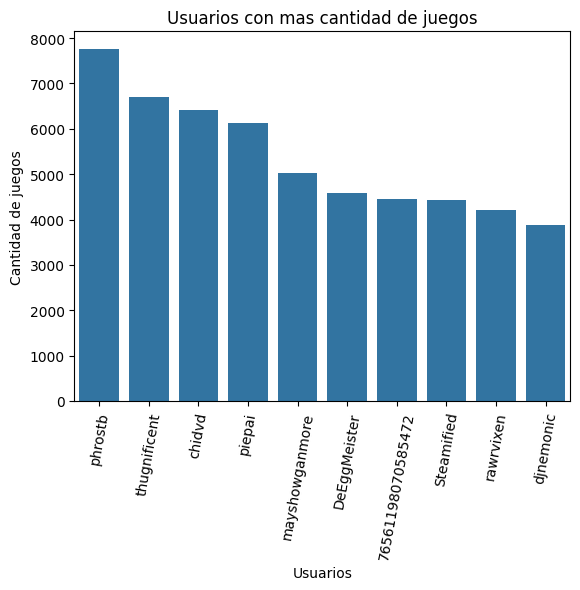

In [19]:
x = user_items['user_id'].value_counts()[:10].index.tolist()
y = user_items['user_id'].value_counts()[:10].values.tolist()

plt.figure()
sns.barplot(x=x, y=y)
plt.title('Usuarios con mas cantidad de juegos')
plt.xlabel('Usuarios')
plt.xticks(rotation=80)
plt.ylabel('Cantidad de juegos')
plt.show()

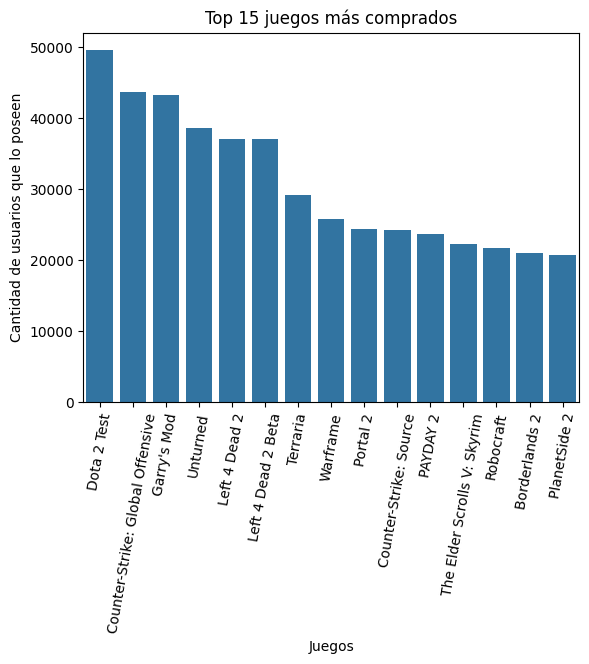

In [20]:
user_items
x = user_items['item_name'].value_counts()[:15].index.tolist()
y = user_items['item_name'].value_counts()[:15].values.tolist()

plt.figure()
sns.barplot(x=x, y=y)
plt.title('Top 15 juegos más comprados')
plt.xlabel('Juegos')
plt.xticks(rotation=80)
plt.ylabel('Cantidad de usuarios que lo poseen')
plt.show()

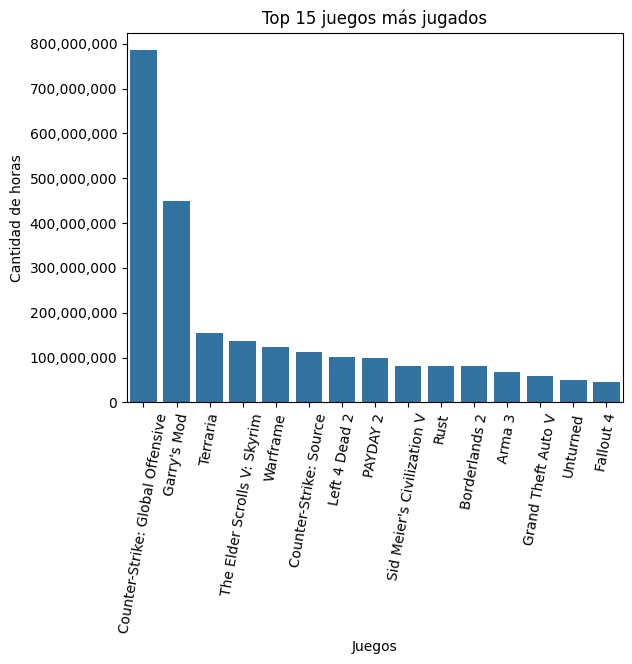

In [21]:
df = user_items[['item_name', 'playtime_forever']].groupby('item_name').sum().reset_index()
df = df.sort_values(by='playtime_forever',ascending=False)
x = df['item_name'][:15].tolist()
y = df['playtime_forever'][:15].tolist()

plt.figure()
sns.barplot(x=x, y=y)
plt.title('Top 15 juegos más jugados')
plt.xlabel('Juegos')
plt.xticks(rotation=80)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('Cantidad de horas')
plt.show()

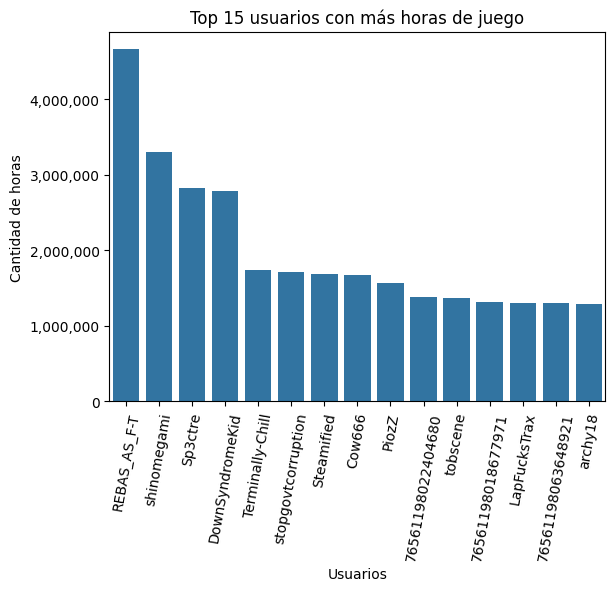

In [22]:
df = user_items[['user_id', 'playtime_forever']].groupby('user_id').sum().reset_index()
df = df.sort_values(by='playtime_forever',ascending=False)
x = df['user_id'][:15].tolist()
y = df['playtime_forever'][:15].tolist()

plt.figure()
sns.barplot(x=x, y=y)
plt.title('Top 15 usuarios con más horas de juego')
plt.xlabel('Usuarios')
plt.xticks(rotation=80)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('Cantidad de horas')
plt.show()

In [23]:
user_items

,item_id,item_name,playtime_forever,user_id
0,10,Counter-Strike,6,76561197970982479
1,20,Team Fortress Classic,0,76561197970982479
2,30,Day of Defeat,7,76561197970982479
3,40,Deathmatch Classic,0,76561197970982479
4,50,Half-Life: Opposing Force,0,76561197970982479
...,...,...,...,...
5153204,346330,BrainBread 2,0,76561198329548331
5153205,373330,All Is Dust,0,76561198329548331
5153206,388490,One Way To Die: Steam Edition,3,76561198329548331
5153207,521570,You Have 10 Seconds 2,4,76561198329548331


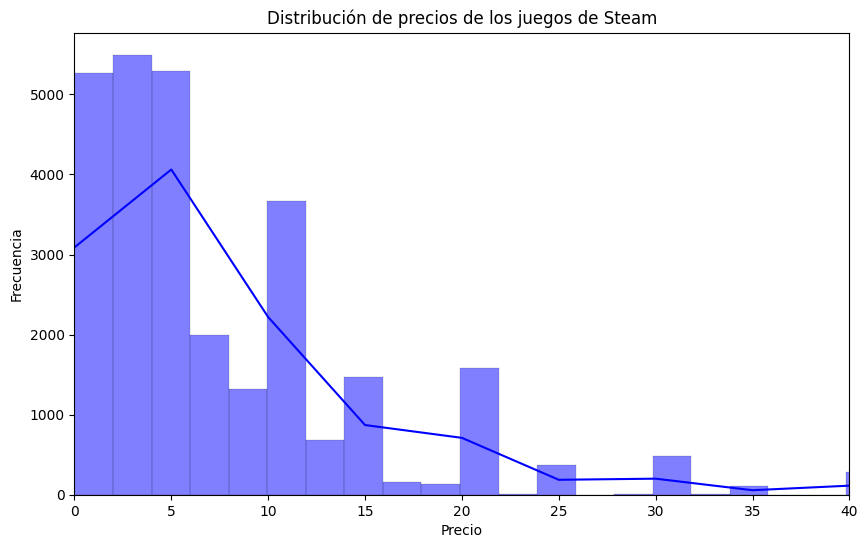

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(steam_games['price'], bins=500, kde=True, color='blue')
plt.title('Distribución de precios de los juegos de Steam')
plt.xlim(0,40)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()
#La mayoria de los juegos rondan entre los 0(Free to play) y 5 dolares.
#Luego de los 40 se consideran outlyers

In [25]:
game_reviews

,item_id,recommend_True,sent_neg,sent_neu,sent_pos,sentiment
0,10,56,2,25,30,2
1,10090,51,6,7,39,2
2,10130,2,0,0,2,2
3,10140,1,1,0,0,0
4,10150,9,1,1,7,2
...,...,...,...,...,...,...
3677,99400,0,1,0,0,0
3678,99700,3,0,1,2,2
3679,99810,5,2,1,5,2
3680,99900,137,10,55,89,2


In [26]:
df = pd.merge(steam_games, game_reviews, 'outer', 'item_id')
df.dropna(subset='sentiment', inplace=True)
df['titles'].fillna('Sin datos', inplace=True)

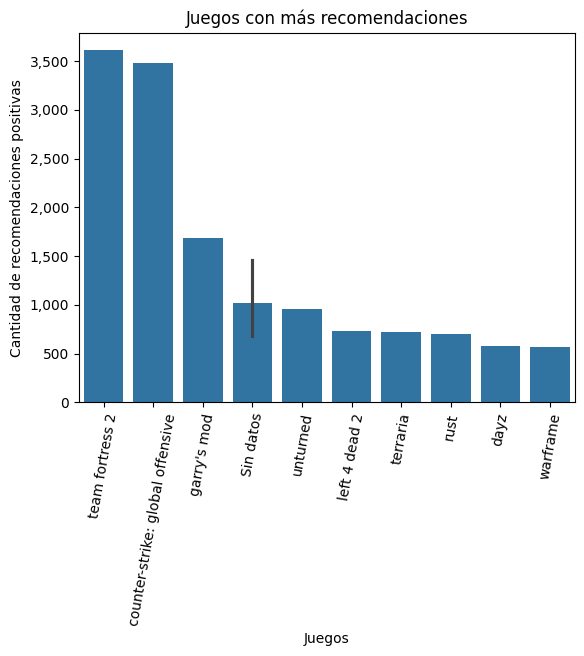

In [30]:
d = df.sort_values(by='recommend_True', ascending=False)
x = d['titles'][:12].tolist()
y = d['recommend_True'][:12].tolist()

plt.figure()
sns.barplot(x=x, y=y)
plt.title('Juegos con más recomendaciones')
plt.xlabel('Juegos')
plt.xticks(rotation=80)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('Cantidad de recomendaciones positivas')
plt.show()

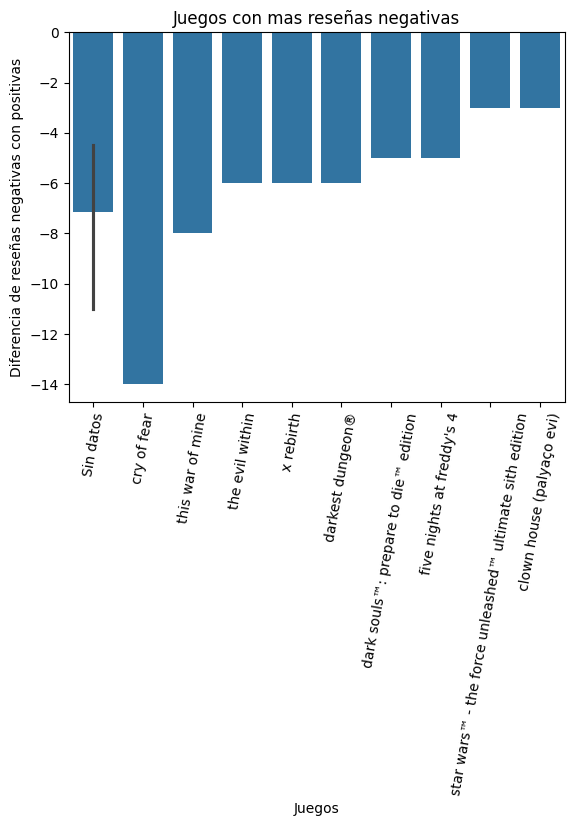

In [33]:
df['score'] = d['sent_pos'] - d['sent_neg']
d = df.sort_values(by='score', ascending=True)
x = d['titles'][:15].tolist()
y = d['score'][:15].tolist()

plt.figure()
sns.barplot(x=x, y=y)
plt.title('Juegos con mas reseñas negativas')
plt.xlabel('Juegos')
plt.xticks(rotation=80)
plt.ylabel('Diferencia de reseñas negativas con positivas')
plt.show()